In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.callbacks import TensorBoard, EarlyStopping
from matplotlib import pyplot as plt         

2023-08-29 17:59:54.994999: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-29 17:59:55.400847: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-29 17:59:55.400867: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-08-29 17:59:56.984311: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## 2. Load data 

In [2]:
# you can traina model that at forst just predict x or y instead of both
import numpy as np

# provided by: Dahvyd Wing 
datax = np.load('/home/amir/Documents/2nd_semester/Data_mining/19April/planets_trajectories/x.npy')  
datay = np.load('/home/amir/Documents/2nd_semester/Data_mining/19April/planets_trajectories/y.npy')  
data_names = np.load('/home/amir/Documents/2nd_semester/Data_mining/19April/planets_trajectories/names.npy') 
time1 = [ i * 0.0001 for i in range(0, 9900000)]
time  = pd.DataFrame(time1)
datax = pd.DataFrame(datax).T
datay = pd.DataFrame(datay).T
data_names = pd.DataFrame(data_names)

datax = datax.rename({0: 'Mercury(x)', 1: 'Venus(x)', 2: 'Earth(x)', 3: 'Mars(x)'}, axis=1) 
datay = datay.rename({0: 'Mercury(y)', 1: 'Venus(y)', 2: 'Earth(y)', 3: 'Mars(y)'}, axis=1) 

time = time.rename({0: 'time'}, axis=1)  
print(datax.shape, datay.shape, time.shape, data_names)

(9900000, 4) (9900000, 4) (9900000, 1)          0
0  Mercury
1    Venus
2    Earth
3     Mars


In [3]:
type(datax)
datay.head(-1)

,Mercury(y),Venus(y),Earth(y),Mars(y)
0,-0.040137,0.722801,-0.001112,1.329954
1,-0.040953,0.722772,-0.000473,1.329720
2,-0.041768,0.722743,0.000166,1.329487
3,-0.042584,0.722713,0.000805,1.329253
4,-0.043399,0.722683,0.001444,1.329019
...,...,...,...,...
9899994,0.049007,0.027471,-0.114744,-1.333078
9899995,0.050237,0.026738,-0.114109,-1.333309
9899996,0.051467,0.026005,-0.113474,-1.333541
9899997,0.052697,0.025272,-0.112840,-1.333772


In [4]:
timex_df = pd.concat([time, datax], axis=1)
timexy_Mercury = pd.concat([time['time'], datax['Mercury(x)'], datay['Mercury(y)']], axis=1)
timexy_Mercury3000 = timexy_Mercury.iloc[0:2400,:]
timexy_Mercury3000.head(-1)

,time,Mercury(x),Mercury(y)
0,0.0000,-0.464524,-0.040137
1,0.0001,-0.464434,-0.040953
2,0.0002,-0.464342,-0.041768
3,0.0003,-0.464249,-0.042584
4,0.0004,-0.464154,-0.043399
...,...,...,...
2394,0.2394,-0.465619,-0.028319
2395,0.2395,-0.465556,-0.029137
2396,0.2396,-0.465490,-0.029955
2397,0.2397,-0.465423,-0.030772


(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x7ffabb8cc640>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x7ffabb8cd240>)

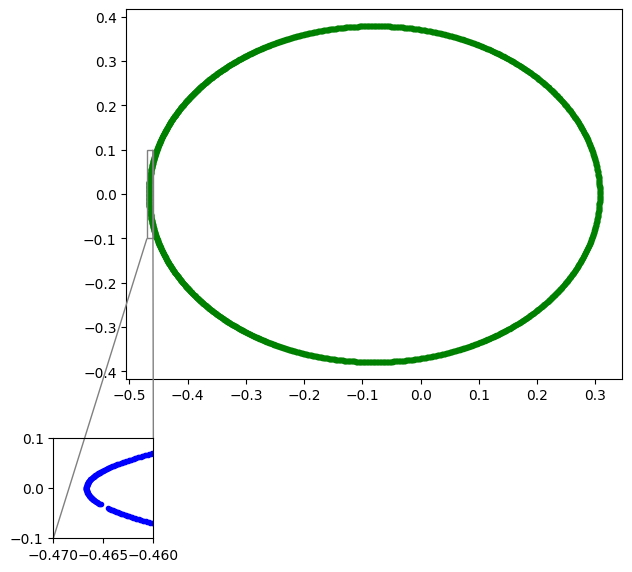

In [5]:
#duplicateRowsDF = timexy_Mercury3000[timexy_Mercury3000.duplicated(['Mercury(x)','Mercury(y)'])]
#index = []
#for i in range(len(timexy_Mercury3000)):
 #   if (timexy_Mercury3000.iloc[i, 2] <= -0.040000 and timexy_Mercury3000.iloc[i, 2] >= -0.040245):
  #      index.append(i)
#print(-0.040137 >= -0.040245)
#index
#for xx in index : print(timexy_Mercury3000.iloc[xx, 2])

#plt.scatter(timexy_Mercury3000.iloc[:,1], timexy_Mercury3000.iloc[:,2], marker='.', color='green', zorder=1)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = plt.subplots()
axins = inset_axes(ax, 1,1 , loc=2, bbox_to_anchor=(.08, 0.35))
ax.scatter(timexy_Mercury3000.iloc[:,1], timexy_Mercury3000.iloc[:,2], marker='.', color='green', zorder=1)

axins.scatter(timexy_Mercury3000.iloc[:,1], timexy_Mercury3000.iloc[:,2], marker='.', color='b', zorder=1)


x1, x2, y1, y2 = -.47, -.46, -0.1, 0.1 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits


mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")


/tmp/ipykernel_212667/3096053281.py:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([l1, l2, l3, l4],     # The line objects


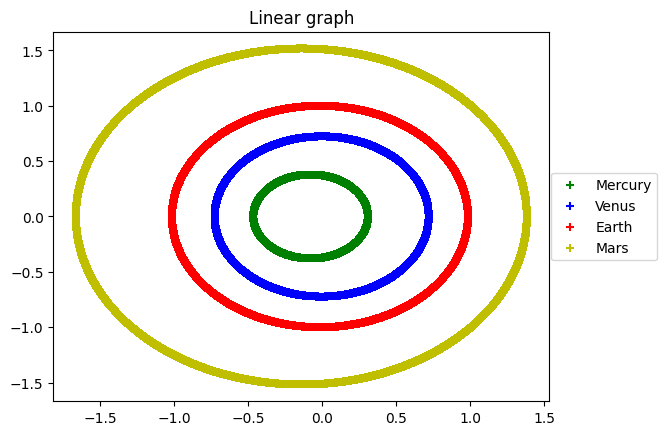

In [6]:
l1 = plt.scatter(datax.iloc[:,0], datay.iloc[:,0], marker='+', color='green', zorder=1)
l2 = plt.scatter(datax.iloc[:,1], datay.iloc[:,1], marker='+', color='blue', zorder=1)
l3 = plt.scatter(datax.iloc[:,2], datay.iloc[:,2], marker='+', color='r', zorder=1)
l4 = plt.scatter(datax.iloc[:,3], datay.iloc[:,3], marker='+', color='y', zorder=1)
plt.title("Linear graph")
line_labels = ["Mercury", "Venus", "Earth", "Mars"]
plt.legend([l1, l2, l3, l4],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center left",    # Position of legend
           bbox_to_anchor=(1, 0.5),
           borderaxespad=0.1,    # Small spacing around legend box
           #title=""  # Title for the legend
           )
plt.show() 

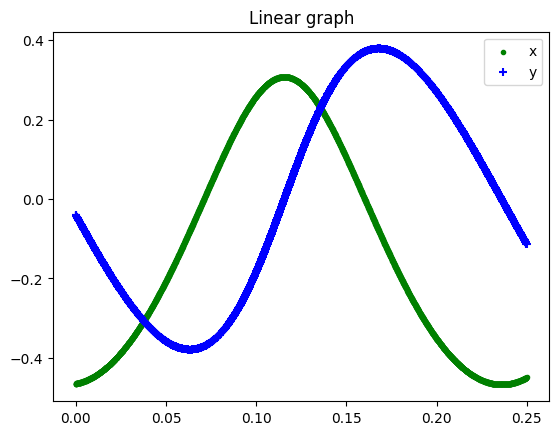

In [7]:
plt.scatter(timexy_Mercury.iloc[0:2500,0], timexy_Mercury.iloc[0:2500,1] , marker='.', color='g', label = 'x')
plt.scatter(timexy_Mercury.iloc[0:2500,0], timexy_Mercury.iloc[0:2500,2], marker='+', color='blue', label = 'y')
plt.title("Linear graph")

plt.legend()

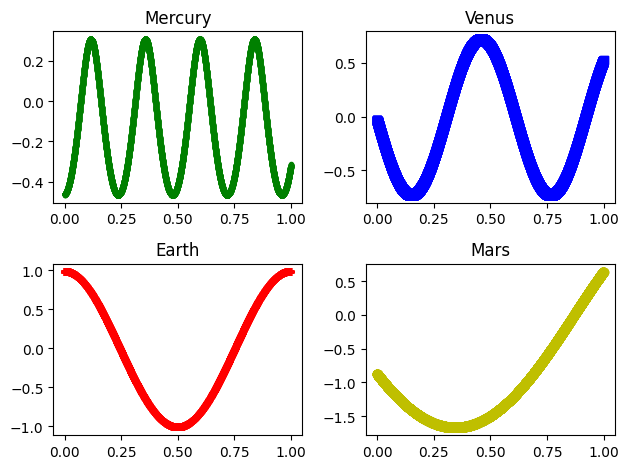

In [8]:
# evolution of a feature over time i.e. position of x for each planet
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(timex_df.iloc[0:10000,0], timex_df.iloc[0:10000,1] , marker='.', color='g')
axs[0, 0].set_title(data_names.iloc[0][0])
axs[0, 1].scatter(timex_df.iloc[0:10000,0], timex_df.iloc[0:10000,2] , marker='s', color='b')
axs[0, 1].set_title(data_names.iloc[1][0])
axs[1, 0].scatter(timex_df.iloc[0:10000,0], timex_df.iloc[0:10000,3] , marker='+', color='r')
axs[1, 0].set_title(data_names.iloc[2][0])
axs[1, 1].scatter(timex_df.iloc[0:10000,0], timex_df.iloc[0:10000,4] , marker='o', color='y')
axs[1, 1].set_title(data_names.iloc[3][0])
fig.tight_layout()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(time.iloc[:], datax.iloc[:,0],  train_size=0.75, random_state=0)
print(X_train.shape)
print(y_train.shape)
#Mercury_x = pd.DataFrame(X_train)
#Mercury_y = pd.DataFrame(y_train)
#print(Mercury_x, '\t', Mercury_y)

(7425000, 1)
(7425000,)


In [17]:
#Normalize the data   >  do you want to do ?

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from keras import optimizers
import keras

# define base model
model = Sequential()
model.add(Dense(100, input_dim = 1, activation = 'relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation = 'linear'))

# Compile model
#opt = keras.optimizers.Adam(lr=0.01, epsilon=1e-07, decay=0.0)
model.compile(loss='mean_squared_error', optimizer = 'Adam', metrics = 'mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               200       
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, y_train, epochs=1, verbose=1, batch_size=64, validation_data = (X_test, y_test))

2023-08-29 18:02:08.983011: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 29700000 exceeds 10% of free system memory.
2023-08-29 18:02:09.144662: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 59400000 exceeds 10% of free system memory.
2023-08-29 18:02:09.420432: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 59400000 exceeds 10% of free system memory.
2023-08-29 18:02:09.610337: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 59400000 exceeds 10% of free system memory.
2023-08-29 18:02:11.024927: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 59400000 exceeds 10% of free system memory.


 20174/116016 [====>.........................] - ETA: 1:55 - loss: 0.3228 - mse: 0.3228

KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(X_test)

40744/77344 [==============>...............] - ETA: 56s

In [24]:
print(y_test[0]- y_pred[0])

[-0.55039036]


2475000    2475000


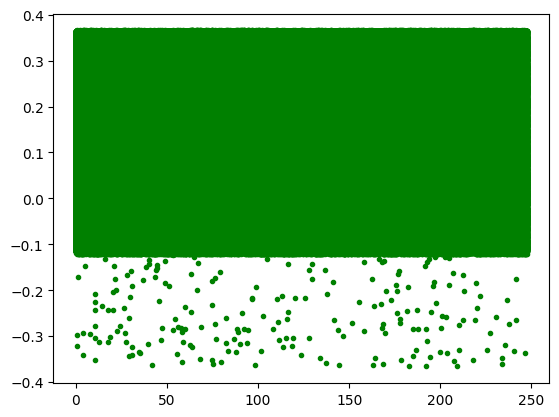

In [40]:
len(y_test)
print(len(y_test), '  ', len(y_pred))
plt.scatter(time.iloc[0:2475000], y_pred[0:2475000] , marker='.', color='g')

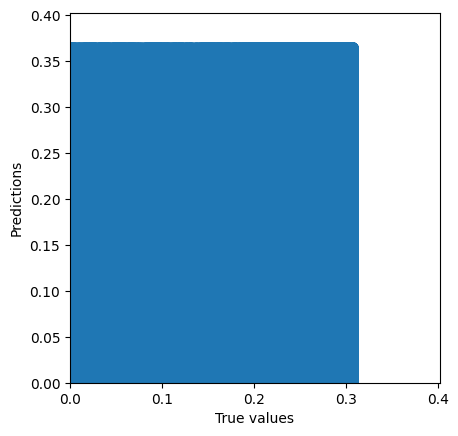

In [37]:
# Plot predictions against ground-truth.
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.axis('square')
# Add some padding to the plot so that all the data can fit in well.
max_val = 1.1 * max(y_test.max(), y_pred.max())
plt.xlim([0, max_val])
plt.ylim([0, max_val])
# Add a diagonal line to appreciate better the predictions.
plt.scatter(y_test, y_pred)
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [14]:
# fix random seed for reproducibility
tf.random.set_seed(7)
dataset = timex_Mercury.values
dataset = dataset.astype('float32')

NameError: name 'timex_Mercury' is not defined

In [18]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [19]:
# split into train and test sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

7425000 2475000


In [20]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [22]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [26]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [13]:
import pandas
import matplotlib.pyplot as plt
dataset = datax['Mercury(x)']
plt.plot(dataset[0:1000,1], dataset[0:1000,0])
plt.show()

KeyError: 'key of type tuple not found and not a MultiIndex'

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [38]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [39]:
# load the dataset
dataframe = timexy_Mercury3000.iloc[:,1:2]
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset

array([[-0.46452358],
       [-0.46443385],
       [-0.4643423 ],
       ...,
       [-0.4654232 ],
       [-0.4653542 ],
       [-0.46528342]], dtype=float32)

In [40]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [41]:
dataset[0]

array([0.00281405], dtype=float32)

In [42]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1608 792


In [43]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [44]:
create_dataset(dataset[1])

(array([], dtype=float64), array([], dtype=float64))

In [45]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [46]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [47]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=19, batch_size=20, verbose=2)

Epoch 1/19
81/81 - 6s - loss: 0.3382 - 6s/epoch - 74ms/step
Epoch 2/19
81/81 - 0s - loss: 0.1803 - 426ms/epoch - 5ms/step
Epoch 3/19
81/81 - 0s - loss: 0.0947 - 440ms/epoch - 5ms/step
Epoch 4/19
81/81 - 0s - loss: 0.0573 - 437ms/epoch - 5ms/step
Epoch 5/19
81/81 - 0s - loss: 0.0433 - 478ms/epoch - 6ms/step
Epoch 6/19
81/81 - 0s - loss: 0.0359 - 488ms/epoch - 6ms/step
Epoch 7/19
81/81 - 0s - loss: 0.0295 - 484ms/epoch - 6ms/step
Epoch 8/19
81/81 - 0s - loss: 0.0233 - 475ms/epoch - 6ms/step
Epoch 9/19
81/81 - 0s - loss: 0.0174 - 489ms/epoch - 6ms/step
Epoch 10/19
81/81 - 0s - loss: 0.0122 - 483ms/epoch - 6ms/step
Epoch 11/19
81/81 - 0s - loss: 0.0078 - 483ms/epoch - 6ms/step
Epoch 12/19
81/81 - 0s - loss: 0.0046 - 489ms/epoch - 6ms/step
Epoch 13/19
81/81 - 0s - loss: 0.0025 - 492ms/epoch - 6ms/step
Epoch 14/19
81/81 - 0s - loss: 0.0012 - 487ms/epoch - 6ms/step
Epoch 15/19
81/81 - 0s - loss: 5.8171e-04 - 482ms/epoch - 6ms/step
Epoch 16/19
81/81 - 0s - loss: 2.8631e-04 - 486ms/epoch - 6ms/

In [48]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

25/25 [==============================] - 0s 5ms/step
Train Score: 0.01 RMSE
Test Score: 0.01 RMSE


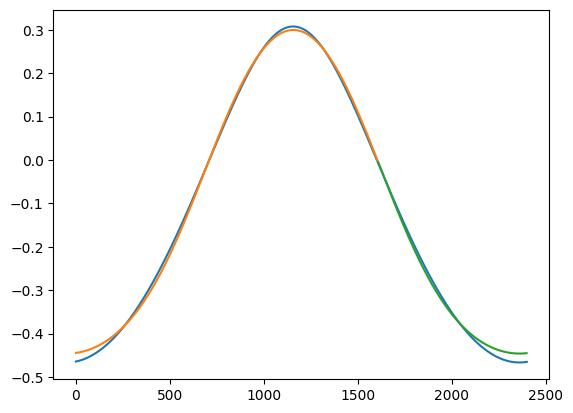

In [49]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()